In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# chargement des donnees 
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# taille de l'image
M = 28
N = 28
channel = 1
nombre_train = train_images.shape[0]
nombre_test = test_images.shape[0]
print(nombre_train)
print(nombre_test)

60000
10000


In [3]:
# Normalisation
train_images, test_images = train_images / 255.0, test_images / 255.0  

# Re-dimension
trainX = train_images.reshape((nombre_train, M, N, channel))
testX = test_images.reshape((nombre_test, M, N, channel))

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(M,N,channel)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 64)                495680    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [6]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.8)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
print("[INFO] training model...")
history = model.fit(trainX, train_labels, validation_data=(testX, test_labels), batch_size=64, epochs=30)

[INFO] training model...
Epoch 1/30


C:\Users\Phuoc Le\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 29s 31ms/step - loss: 0.4811 - accuracy: 0.8511 - val_loss: 0.1253 - val_accuracy: 0.9614
Epoch 2/30
938/938 [==============================] - 33s 35ms/step - loss: 0.1963 - accuracy: 0.9415 - val_loss: 0.0796 - val_accuracy: 0.9738
Epoch 3/30
938/938 [==============================] - 33s 35ms/step - loss: 0.1430 - accuracy: 0.9580 - val_loss: 0.0653 - val_accuracy: 0.9784
Epoch 4/30
938/938 [==============================] - 29s 31ms/step - loss: 0.1146 - accuracy: 0.9665 - val_loss: 0.0511 - val_accuracy: 0.9827
Epoch 5/30
938/938 [==============================] - 29s 31ms/step - loss: 0.1005 - accuracy: 0.9704 - val_loss: 0.0502 - val_accuracy: 0.9827
Epoch 6/30
938/938 [==============================] - 33s 35ms/step - loss: 0.0884 - accuracy: 0.9736 - val_loss: 0.0467 - val_accuracy: 0.9844
Epoch 7/30
938/938 [==============================] - 30s 32ms/step - loss: 0.0789 - accuracy: 0.9765 - val_loss: 0.0405 - val_accuracy: 0.9871
Epo

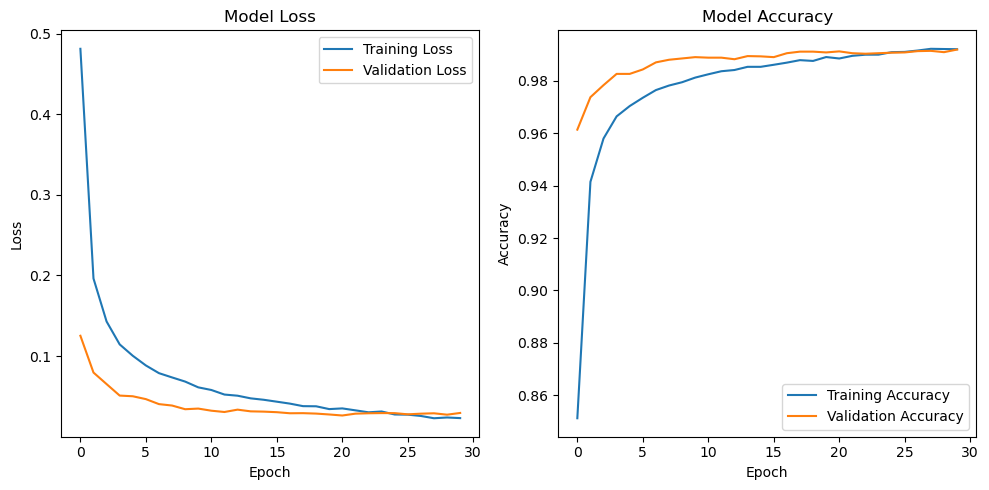

In [11]:
# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot loss on the first subplot
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')

# Plot accuracy on the second subplot
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(testX, test_labels, verbose=2)

313/313 - 1s - loss: 0.0295 - accuracy: 0.9920 - 1s/epoch - 5ms/step
